In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
dataset = pd.read_csv('psglgd.csv').iloc[:, 1:]
dataset.head()

,match_id,opposing_team_id,side,duration,my_hero_1,my_hero_2,my_hero_3,my_hero_4,my_hero_5,opposing_hero_1,...,opposing_hero_3,opposing_hero_4,opposing_hero_5,my_team_kills,opposing_team_kills,gold_adv,xp_adv,my_tower_status,opposing_team_tower_status,win
0,6809621786,7732977,dire,1901,136,11,61,87,17,85,...,43,46,19,28,13,19623,18197,1974,1536,1
1,6809585544,7732977,radiant,1613,137,52,91,18,7,129,...,74,68,10,22,6,24806,29717,1983,1572,1
2,6809420587,6209804,radiant,1672,137,66,114,38,119,11,...,128,120,64,32,9,15500,16130,1983,1536,1
3,6808199906,2163,radiant,2583,33,19,110,13,10,85,...,86,35,2,20,25,10673,18586,1956,288,1
4,6808106195,2163,radiant,2785,33,19,25,87,54,137,...,52,38,99,32,29,14209,32044,1828,0,1


In [33]:
pd.DataFrame({'columns': dataset.columns.tolist()})

,columns
0,match_id
1,opposing_team_id
2,side
3,duration
4,my_hero_1
5,my_hero_2
6,my_hero_3
7,my_hero_4
8,my_hero_5
9,opposing_hero_1


In [34]:
X = dataset.iloc[:, [3, 18]].values

In [35]:
X

array([[1901, 1974],
       [1613, 1983],
       [1672, 1983],
       ...,
       [2827, 1828],
       [1556, 2039],
       [2607,    6]], dtype=int64)

### K-Means clustering

In [36]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

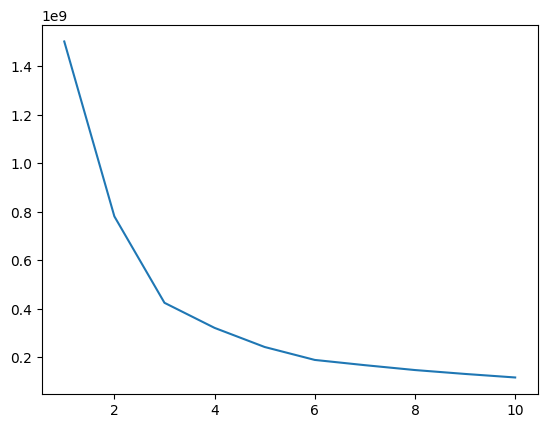

In [37]:
plt.plot(range(1,11), wcss)

In [38]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=1)
y_means = kmeans.fit_predict(X)

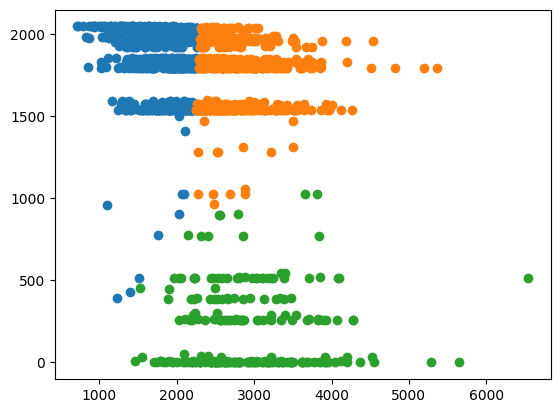

In [39]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1])
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1])
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1])

### Hierarchical Clustering

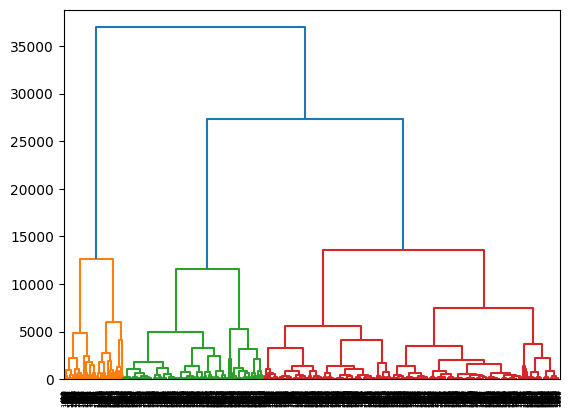

In [40]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [41]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3)
y_hc = hc.fit_predict(X)

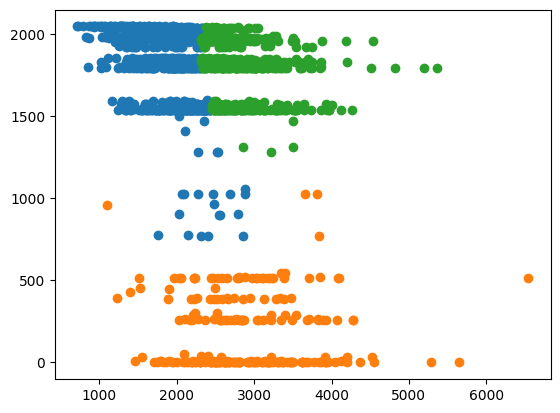

In [42]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1])
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1])
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1])